In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation 
from matplotlib import colors
from celluloid import Camera

In [75]:
##INITIALISATION

#rates
ri = 0.1 #infection
rm = 1.0 #movement
rr = 0.01 #recovery

#width of lattice 
n = 20

#initial proportions
s0 = 0.49
i0 = 0.01
r0 = 0.00

#initialise array with individuals
#1d array with required number of individuals
A = np.zeros((n**2))
S_num = int(s0 * n**2)
I_num = int(i0 * n**2)
R_num = int(r0 * n**2)
A[:S_num] = 1
A[S_num:S_num+I_num] = 2
A[S_num + I_num:S_num + I_num + R_num] = 3
#shuffle and reshape to 2d
np.random.shuffle(A)
A = A.reshape(n,n)

#time
t = 0
max_time = 5/rr

#lists
t_list = [t]
S_list = [S_num]
I_list = [I_num]
R_list = [R_num]
A_list = [A]
A_start = A

snapshot_count = 0

def move(location):
    state = A[location]
    direction = np.random.randint(4)

    #move up, y < n - 1
    if direction == 0 and location[1] < n - 1:
        if A[(location[0],location[1]+1)] == 0:
            A[(location[0],location[1]+1)] = state
            A[location] = 0
    #move down, y > 0
    if direction == 1 and location[1] > 0:
        if A[(location[0],location[1]-1)] == 0:
            A[(location[0],location[1]-1)] = state
            A[location] = 0
    #move right, x < n - 1
    if direction == 2 and location[0] < n - 1:
        if A[(location[0]+1,location[1])] == 0:
            A[(location[0]+1,location[1])] = state
            A[location] = 0
    #move right, x > 0
    if direction == 3 and location[0] > 0:
        if A[(location[0]-1,location[1])] == 0:
            A[(location[0]-1,location[1])] = state
            A[location] = 0

def infect(location):
    direction = np.random.randint(4)

    #infect up, y < n - 1
    if direction == 0 and location[1] < n - 1:
        if A[(location[0],location[1]+1)] == 1:
            A[(location[0],location[1]+1)] = 2
    #infect down, y > 0
    if direction == 1 and location[1] > 0:
        if A[(location[0],location[1]-1)] == 1:
            A[(location[0],location[1]-1)] = 2
    #infect right, x < n - 1
    if direction == 2 and location[0] < n - 1:
        if A[(location[0]+1,location[1])] == 1:
            A[(location[0]+1,location[1])] = 2
    #infect left, x > 0
    if direction == 3 and location[0] > 0:
        if A[(location[0]-1,location[1])] == 1:
            A[(location[0]-1,location[1])] = 2

def get_random_agent_location(infectedOnly=False):
    if infectedOnly:
        individuals = np.where(A==2)
    else:
        individuals = np.where(A!=0)
    
    random_individual_index = np.random.randint(len(individuals[0]))
    location = (individuals[0][random_individual_index], individuals[1][random_individual_index])
    return location

In [78]:
##ABM

while t < max_time:
    #decide which event takes place and advance time
    a = rm*(S_num+I_num+R_num) + ri*I_num + rr*I_num
    step = np.random.uniform()/a
    t += step
    event = a*np.random.uniform()

    if event <= rm*(S_num+I_num+R_num):
        #movement
        loc = get_random_agent_location()
        move(loc)
        #print("Move " + str(loc))
    elif (rm*(S_num+I_num+R_num) < event) and  (event <= rm*(S_num+I_num+R_num) + ri*I_num):
        #infection
        loc = get_random_agent_location(infectedOnly=True)
        infect(loc)
        #print("Infect " + str(loc))
    elif (rm*(S_num+I_num+R_num) + ri*I_num < event) and  (event <= rm*(S_num+I_num+R_num) + ri*I_num + rr*I_num):
        #recovery
        loc = get_random_agent_location(infectedOnly=True)
        A[loc] = 3
        #print("Recover " + str(loc))
    
    S_num = np.sum(A==1)
    I_num = np.sum(A==2)
    R_num = np.sum(A==3)

    t_list.append(t)
    S_list.append(S_num)
    I_list.append(I_num)
    R_list.append(R_num)
    if t > snapshot_count*max_time/600:
        A_list.append(A)
        snapshot_count+=1


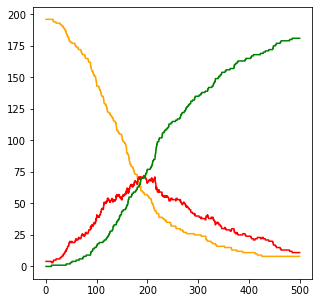

In [80]:
##PLOT

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(t_list[::4],S_list[::4], 'orange')
ax.plot(t_list[::4],I_list[::4], 'red')
ax.plot(t_list[::4],R_list[::4], 'green')

<ipython-input-81-774f247a00cd>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


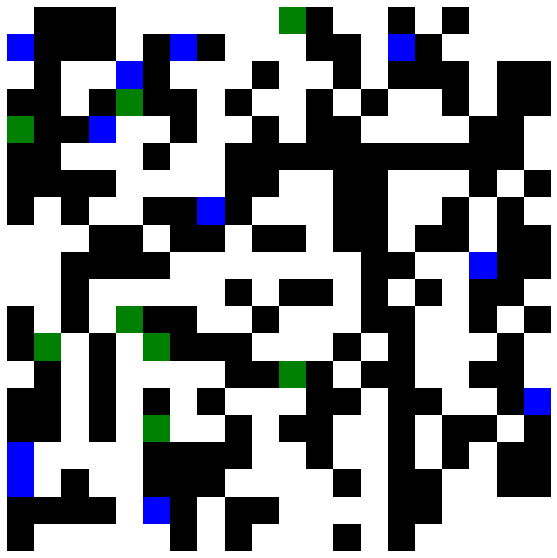

In [81]:
fig = plt.figure(figsize=(10,10))
plt.axis('off')
camera=Camera(fig)
cmap = colors.ListedColormap(['w','green','blue','k'], N=4)
for copy in A_list:
    plt.imshow(copy, cmap=cmap)
    camera.snap()

anim = camera.animate()
anim.save('anims/test21.mp4')